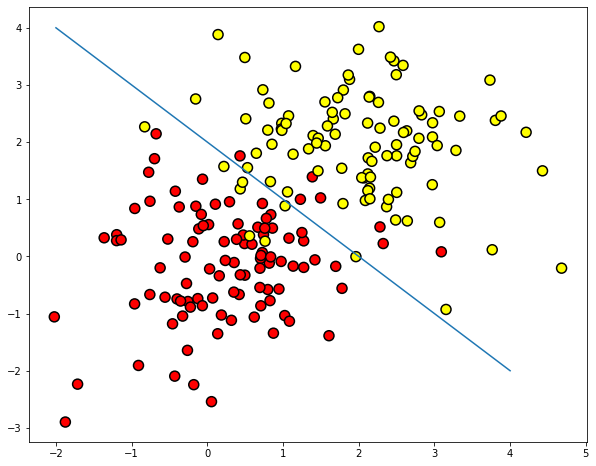

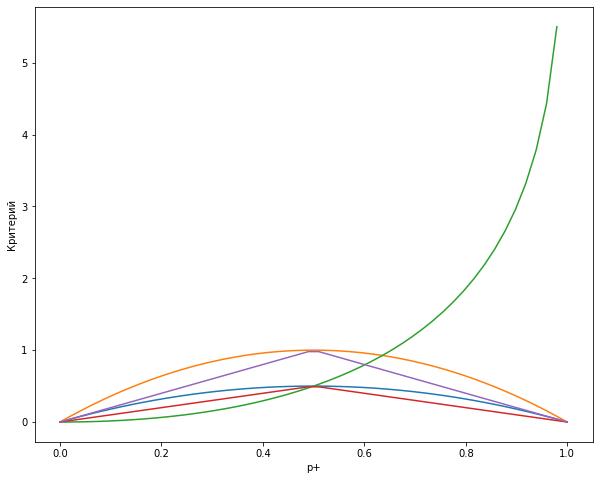

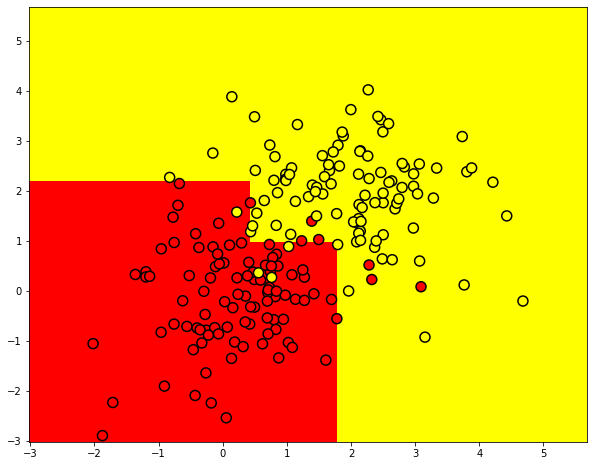

In [ ]:
from __future__ import division, print_function
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#---Напишем вспомогательную функцию, которая будет возвращать решётку для дальнейшей визуализации---

def get_grid (data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# первый класс
np.speed = 7
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

plt.rcParams['figure.figsize'] = (10, 8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.plot(range(-2, 5), range(4, -3, -1))
plt.show()

#----------Отрисовка графиков----------

plt.rcParams['figure.figsize'] = (10, 8)
xx = np.linspace(0, 1, 50)
plt.plot(xx, [2 * x * (1 - x) for x in xx], label = 'Джини')
plt.plot(xx, [4 * x * (1 - x) for x in xx], label = 'Джини х2')
plt.plot(xx, [-x * np.log2(1 - x) for x in xx], label = 'Энтропия')
plt.plot(xx, [1- max(x, 1 - x) for x in xx], label = 'Ошибка классификации')
plt.plot(xx, [2- 2 * max(x, 1 - x) for x in xx], label = 'Ошибка классификации')
plt.xlabel('p+')
plt.ylabel('Критерий')
plt.show()

#Параметр mean_samples_leaf показывает при каком минимальном кол-ве эл-в в узле он будет дольше разделяться
clf_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolors='black', linewidths=1.5)
